# BJJ Heroes Fighter Dataset: Descriptive Statistics

#### Step 3: Exploratory Data Analysis on Fighters 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
elo = pd.read_csv('all_fighter_histories.csv')
elo['Fighter'] = elo.Fighter.map(lambda x: x.replace("Fight History", ""))
elo['Opponent'] = elo.Opponent.str.split(" ")
elo['Opponent'] = elo.Opponent.str[0] + " " +elo.Opponent.str[-1]
elo['Fighter'] = elo.Fighter.str.strip()
elo

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
0,13577,Masahiro Iwasaki,L,Points,Asian Open,76KG,4F,2017,Ali Monfaradi
1,13592,Keenan Cornelius,L,Armbar,Asian Open,ABS,R1,2017,Ali Monfaradi
2,13976,Adam Wardzinski,L,Arm in ezekiel,German Nationals,ABS,SF,2017,Ali Monfaradi
3,13987,Adam Wardzinski,L,Von Fluke choke,German NoGi,ABS,F,2017,Ali Monfaradi
4,14016,Jake Mackenzie,L,Points,London Fall Open,76KG,SF,2017,Ali Monfaradi
...,...,...,...,...,...,...,...,...,...
24847,17552,Lukasz Michaelec,W,Kimura,ADCC EU Trials,99KG,4F,2018,Perttu Tepponen
24848,17553,Andrzej Iwat,W,Pts: 3x0,ADCC EU Trials,99KG,SF,2018,Perttu Tepponen
24849,17555,Muslim Patsarigov,W,"Pts: 0x0, Pen",ADCC EU Trials,99KG,F,2018,Perttu Tepponen
24850,21808,Matheus Godoy,W,Points,Amsterdam Open,100KG,F,2019,Perttu Tepponen


Total Fighters

In [130]:
len(elo.Fighter.unique()) #total fighters

396

In [44]:
len(elo1.Fighter.unique())

369

Years

In [23]:
len(elo.Year.unique())

49

In [24]:
elo.Year.value_counts()

2019    4397
2018    4359
2017    3831
2016    2814
2015    2614
2014    1381
2013    1034
2012     795
2011     726
2009     430
2010     426
2007     309
2008     254
2005     235
2003     219
2006     203
2004     159
2001     141
2000     131
2002      99
1999      93
1998      62
1997      39
1996      31
1984      11
1994       7
1986       6
1985       6
1995       4
1932       3
1993       3
1991       3
1936       3
1951       3
1987       3
1935       2
1950       2
1934       2
1981       2
1975       1
1954       1
1973       1
yes        1
1955       1
1976       1
1937       1
1988       1
1977       1
1983       1
Name: Year, dtype: int64

Matches

In [20]:
len(elo['W/L']) #total matches

24852

In [45]:
len(elo1['W/L']) #total matches in 10 years

22377

Opponent Fighters

In [47]:
len(elo1.Opponent.unique()) #unique opponents

5066

Method

In [49]:
len(elo.Method.unique())

376

In [48]:
len(elo1.Method.unique())

360

Weight Class

In [80]:
len(elo.Weight.unique())

98

Competition

In [4]:
len(elo.Competition.unique()) #total competitions

1147

In [7]:
comp_names = elo.Competition.unique().tolist()
df1 = pd.DataFrame(comp_names, columns=["Tournaments"])
df1.to_csv('comp_names.csv', index=False)

In [46]:
len(elo1.Competition.unique()) 

1046

In [51]:
print(elo1.Competition.unique())

['Asian Open' 'German Nationals' 'German NoGi' ... 'UGI' 'EGO' 'Fuji']


#### About the Dataset on BJJ Heroes

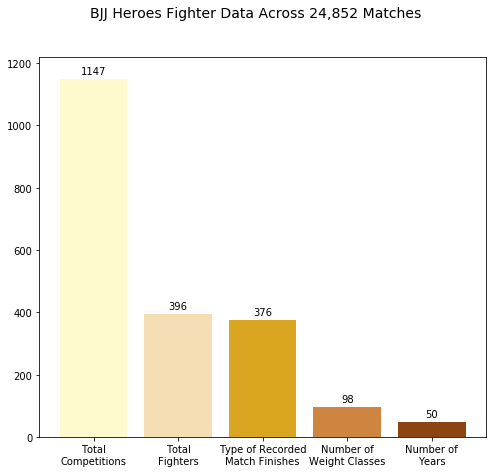

In [41]:
# fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,7))
x = np.arange(5)
fighters = [1147, 396, 376, 98, 50]
my_colors = ['lemonchiffon','wheat','goldenrod','peru','saddlebrown']
rects1 = plt.bar(x, fighters, color=my_colors)
plt.xticks(x, ('Total\nCompetitions', 'Total\nFighters', 'Type of Recorded\nMatch Finishes',  
               'Number of\nWeight Classes','Number of\nYears',))

ax.set_ylim((0, 1220))
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.suptitle('BJJ Heroes Fighter Data Across 24,852 Matches', fontsize=14)

plt.show()
fig.savefig(path + 'summary of bjjheroes data.png')

Clean Data to Last 10 Years

In [8]:
elo.Year.dtype

dtype('O')

In [9]:
elo.loc[elo.Year == 'yes']

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
16382,11342,S. Canquerino,W,Pts: 2x0,Sharjah Pro,77KG,F,yes,Tiago Bravo


In [10]:
elo.drop(16382, inplace=True)

In [11]:
elo.Year=elo.Year.astype(int)

In [12]:
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
elo1 = elo.loc[elo.Year.isin(years)]
elo1.shape

(22377, 9)

In [13]:
len(elo1.Year.unique())

10

#### Top Methods of Match Finishes

In [14]:
elo1.Method.value_counts()[:50]

Points                 2427
Pts: 2x0               1783
Referee Decision       1742
Choke from back        1309
Armbar                 1213
Pts: 0x0, Adv          1030
Pts: 4x2                648
RNC                     564
Adv                     518
Pts: 2x2, Adv           513
Triangle                505
Pts: 4x0                475
Submission              445
Choke                   407
Kneebar                 347
Pts: 3x0                321
Toe hold                316
Pts: 6x0                271
Botinha                 258
Pts: 5x0                225
Bow and arrow           209
---                     205
DQ                      196
Pts: 6x4                181
Pts: 4x4, Adv           176
Pts: 6x2                176
Guillotine              157
Pts: 7x0                155
Inside heel hook        143
Footlock                143
Kimura                  142
Pts: 8x0                138
Pts: 10x0               136
Pts: 9x0                135
Cross choke             121
EBI/OT              

In [19]:
elo1.loc[elo1.Method == '---']

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
72,6172,Luiz Panza,D,---,Copa Podio,85KG,GP,2014,Diogo Sampaio
377,5849,Jeff Glover,D,---,Metamoris 4,ABS,SPF,2014,Baret Yoshida
379,8001,Robson Moura,D,---,Polaris 2,70KG,SPF,2015,Baret Yoshida
380,8768,Josh Hinger,D,---,Gracie NoGi Worlds,ABS,F,2015,Baret Yoshida
535,4367,Leandro Lo,D,---,World Expo,ABS,SPF,2013,Jake Shields
...,...,...,...,...,...,...,...,...,...
24502,18275,Mathew Tesla,D,---,Nacka Dojo,ABS,SPF,2018,Kit Dale
24605,4142,Roger Gracie,D,---,Metamoris,ABS,SPF,2012,Marcus Almeida
24748,18870,Luan Carvalho,D,---,Copa Podio,77KG,RR,2019,Alef Brito
24749,18872,Diego Pato,D,---,Copa Podio,77KG,RR,2019,Alef Brito


In [20]:
unknown = elo1.loc[elo1.Method == '---']
unknown['W/L'].value_counts()

D    205
Name: W/L, dtype: int64

In [22]:
unknown.Competition.value_counts()

Copa Podio            50
Polaris 3             12
Kasai Pro             11
Metamoris 5            8
Quintet II             6
Metamoris 4            6
Metamoris 6            6
Metamoris              5
World Expo             5
Polaris                5
Quintet 3              5
Metamoris 3            5
Quintet FN4            4
Kasai Pro 6            4
Berkut 2               4
Sub Series Pro         4
Quintet FN             4
Metamoris 7            4
Kasai Pro 3            4
Kasai 5                3
Polaris 2              3
Metamoris 2            3
Quintet                2
Desafio UK             2
Sapateiro 2            2
ACBJJ World            2
Kasai Pro 4            2
Battle Grapple         2
Spyder Inv. Final      2
Fury Fighting          2
Kakuto Challenge       2
Gracie NoGi Worlds     2
Guatemala Open         2
Battle Field           2
Quintet FN2            2
WSOF 1                 2
London Winter Op.      1
Metamoris UG           1
Sapateiro Inv.         1
Macaco Branco          1


In [21]:
elo1.loc[elo1.Method == 'Referee Decision']

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
74,7232,Felipe Cesar,L,Referee Decision,Brasileiro,ABS,R2,2015,Diogo Sampaio
75,7727,Ricardo Bastos,L,Referee Decision,Austin Open,94KG,F,2015,Diogo Sampaio
78,8630,Vinicius Marinho,L,Referee Decision,Grand Slam RJ,85KG,3RD,2015,Diogo Sampaio
83,10898,Josh Hinger,L,Referee Decision,NoGi Worlds,ABS,R1,2016,Diogo Sampaio
86,13167,Flavio Almeida,L,Referee Decision,F2W Pro 37,ABS,SPF,2017,Diogo Sampaio
...,...,...,...,...,...,...,...,...,...
24741,22056,Alexandre Cavaliere,L,Referee Decision,Salvador SPO,82KG,F,2019,Alef Brito
24745,17345,Kim Terra,W,Referee Decision,Grand Slam LA,77KG,R1,2018,Alef Brito
24755,19408,Marlus Salgado,W,Referee Decision,Coliseu JJ,76KG,SF,2019,Alef Brito
24819,20820,Eric Phan,W,Referee Decision,Orlando SMO,70KG,SF,2019,Deandre Corbe


In [29]:
elo1['Method'] = elo1['Method'].str.replace('---','Super Fight Decision')

In [32]:
(elo1.Method.value_counts(normalize=True)*100)[:50]

Points                  11.223121
Pts: 2x0                 8.245087
Referee Decision         8.055491
Choke from back          6.053179
Armbar                   5.609249
Pts: 0x0, Adv            4.763006
Pts: 4x2                 2.996532
RNC                      2.608092
Adv                      2.395376
Pts: 2x2, Adv            2.372254
Triangle                 2.335260
Pts: 4x0                 2.196532
Submission               2.057803
Choke                    1.882081
Kneebar                  1.604624
Pts: 3x0                 1.484393
Toe hold                 1.461272
Pts: 6x0                 1.253179
Botinha                  1.193064
Pts: 5x0                 1.040462
Bow and arrow            0.966474
Super Fight Decision     0.947977
DQ                       0.906358
Pts: 6x4                 0.836994
Pts: 6x2                 0.813873
Pts: 4x4, Adv            0.813873
Guillotine               0.726012
Pts: 7x0                 0.716763
Footlock                 0.661272
Inside heel ho

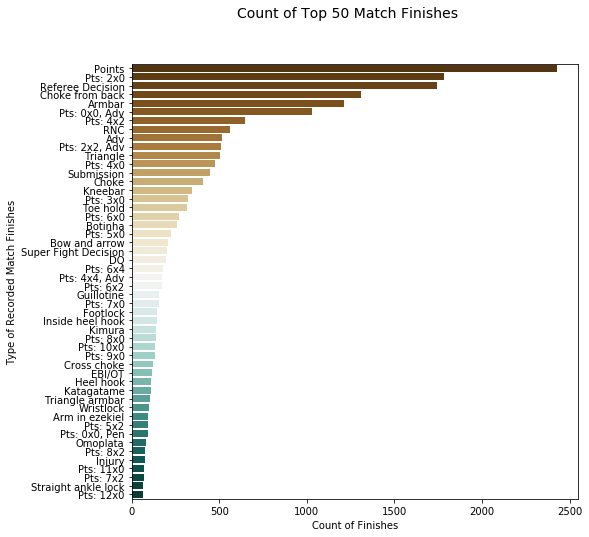

In [31]:
method = elo1.Method.value_counts()[:50]
df_methodCount = pd.DataFrame({'Type of Recorded Match Finishes':method.index, 'Count of Finishes':method.values}).sort_values("Count of Finishes", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Count of Top 50 Match Finishes",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Count of Finishes", y="Type of Recorded Match Finishes", data=df_methodCount, palette="BrBG")
fig.savefig(path + 'Count of All Match Finishes.png',bbox_inches='tight')

In [33]:
elo1.loc[elo1.Method == 'Points']

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
0,13577,Masahiro Iwasaki,L,Points,Asian Open,76KG,4F,2017,Ali Monfaradi
4,14016,Jake Mackenzie,L,Points,London Fall Open,76KG,SF,2017,Ali Monfaradi
14,17689,Alexandre Molinaro,L,Points,London Fall Open,76KG,4F,2018,Ali Monfaradi
16,17702,Alexandre Molinaro,L,Points,London Fall NGO,79KG,F,2018,Ali Monfaradi
24,21560,Alexandre Molinaro,L,Points,Rome Open,76KG,SF,2019,Ali Monfaradi
...,...,...,...,...,...,...,...,...,...
24822,19438,Ygor Rodrigues,L,Points,Rio Fall Open,76KG,SF,2019,Vinicius Pereira
24823,19880,Ygor Rodrigues,L,Points,Brasileiro,76KG,4F,2019,Vinicius Pereira
24824,18583,Jan Basso,W,Points,European Open,76KG,R1,2019,Vinicius Pereira
24828,18952,Daniel Neri,W,Points,Curitiba SM. Open,76KG,F,2019,Vinicius Pereira


#### Top Finishes in the Last 3 Years

In [42]:
years2 = [2017,2018,2019]
elo3 = elo.loc[elo.Year.isin(years2)]
elo3.shape

(12587, 9)

In [43]:
elo3.Method.value_counts()[:10]

Points              1291
Referee Decision    1221
Pts: 2x0            1068
Choke from back      747
Pts: 0x0, Adv        697
Armbar               575
Pts: 4x2             373
RNC                  350
Submission           300
Pts: 2x2, Adv        289
Name: Method, dtype: int64

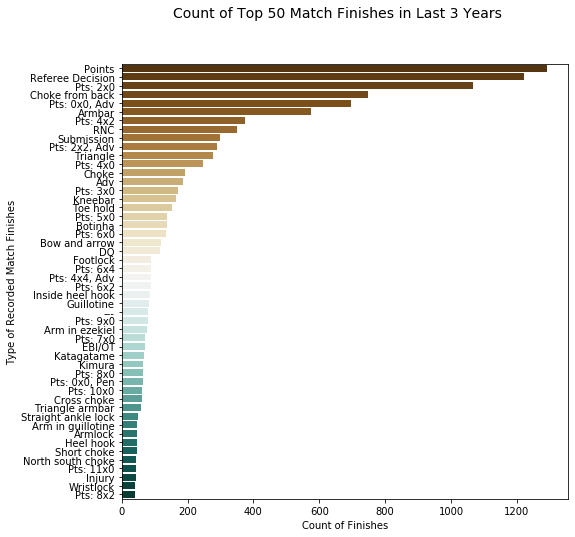

In [155]:
method2 = elo3.Method.value_counts()[:50]
df_method2Count = pd.DataFrame({'Type of Recorded Match Finishes':method2.index, 'Count of Finishes':method2.values}).sort_values("Count of Finishes", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Count of Top 50 Match Finishes in Last 3 Years",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Count of Finishes", y="Type of Recorded Match Finishes", data=df_method2Count, palette="BrBG")
fig.savefig(path + 'Count of Top 50 Match Finishes in Last 3 Years.png',bbox_inches='tight')

#### Top Competitions by Number of Matches

In [69]:
elo1.Competition.value_counts()[:25]

World Champ.       2252
Pan American       1526
NoGi Worlds         973
Brasileiro          785
ADCC                719
World Pro           680
European Open       628
Copa Podio          487
Grand Slam RJ       453
Grand Slam LA       356
South American      280
World Pro.          255
No Gi Pan Am.       216
Brasileiro NoGi     214
King of Mats        212
European            203
Grand Slam LDN      184
Las Vegas Open      180
NY Spring Open      164
European NoGi       161
American Nats       135
Grand Slam AD       126
Rome Open           123
Grand Slam TYO      117
ADCC WC Trials      116
Name: Competition, dtype: int64

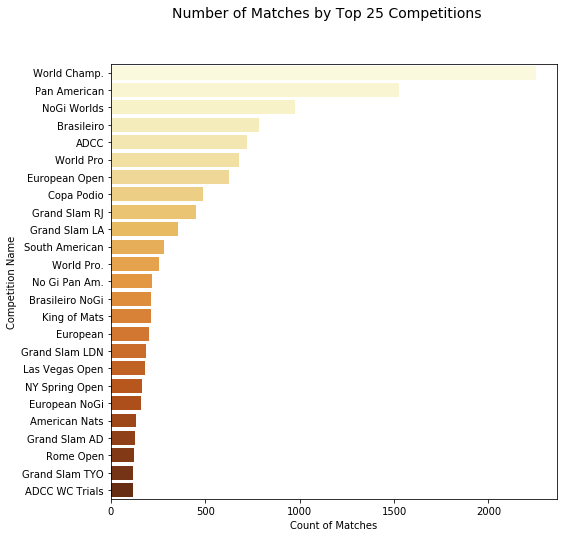

In [94]:
comps = elo1.Competition.value_counts()[:25]
df_compCount = pd.DataFrame({'Competition Name':comps.index, 'Count of Matches':comps.values}).sort_values("Count of Matches", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Number of Matches by Top 25 Competitions",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Count of Matches", y="Competition Name", data=df_compCount, palette="YlOrBr")
fig.savefig(path + 'Number of Matches by Top 25 Competitions.png',bbox_inches='tight')

#### Number of Matches by Year

In [95]:
elo1.Year.value_counts()

2019    4397
2018    4359
2017    3831
2016    2814
2015    2614
2014    1381
2013    1034
2012     795
2011     726
2010     426
Name: Year, dtype: int64

In [97]:
elo1.Year.dtype

dtype('int32')

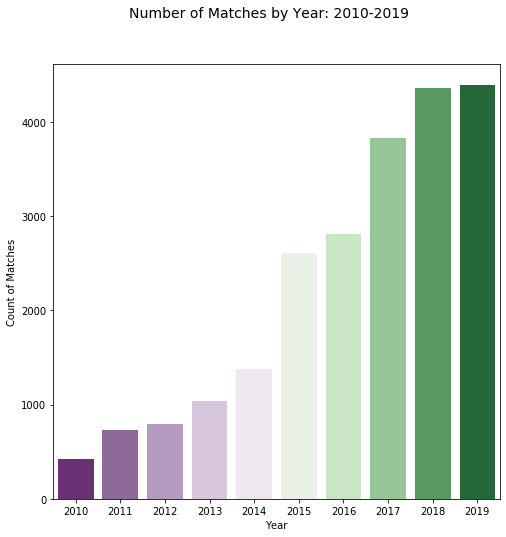

In [103]:
year = elo1.Year.value_counts()
df_yearCount = pd.DataFrame({'Year':year.index, 'Count of Matches':year.values}).sort_values("Count of Matches", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Number of Matches by Year: 2010-2019",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Year", y="Count of Matches", data=df_yearCount, palette="PRGn")
fig.savefig(path + 'Number of Matches by Year 2010-2019.png',bbox_inches='tight')

#### Number of Fighters by Year

In [161]:
elo2010 = elo1.loc[elo1.Year == 2010]
print(len(elo2010))
print(len(elo2010.Fighter.unique()))
elo2011 = elo1.loc[elo1.Year == 2011]
print(len(elo2011))
print(len(elo2011.Fighter.unique()))
elo2012 = elo1.loc[elo1.Year == 2012]
print(len(elo2012))
print(len(elo2012.Fighter.unique()))
elo2013 = elo1.loc[elo1.Year == 2013]
print(len(elo2013))
print(len(elo2013.Fighter.unique()))
elo2014 = elo1.loc[elo1.Year == 2014]
print(len(elo2014))
print(len(elo2014.Fighter.unique()))
elo2015 = elo1.loc[elo1.Year == 2015]
print(len(elo2015))
print(len(elo2015.Fighter.unique()))
elo2016 = elo1.loc[elo1.Year == 2016]
print(len(elo2016))
print(len(elo2016.Fighter.unique()))
elo2017 = elo1.loc[elo1.Year == 2017]
print(len(elo2017))
print(len(elo2017.Fighter.unique()))
elo2018 = elo1.loc[elo1.Year == 2018]
print(len(elo2018))
print(len(elo2018.Fighter.unique()))
elo2019 = elo1.loc[elo1.Year == 2019]
print(len(elo2019))
print(len(elo2019.Fighter.unique()))

426
68
726
93
795
91
1034
114
1381
139
2614
179
2814
206
3831
247
4359
272
4397
282


#### Top Fighters with the Most Wins

In [146]:
elo1['W/L'].value_counts()

W    15701
L     6471
D      205
Name: W/L, dtype: int64

In [150]:
elo2 = elo1.loc[elo1['W/L'] == 'W']
elo2.shape

(15701, 9)

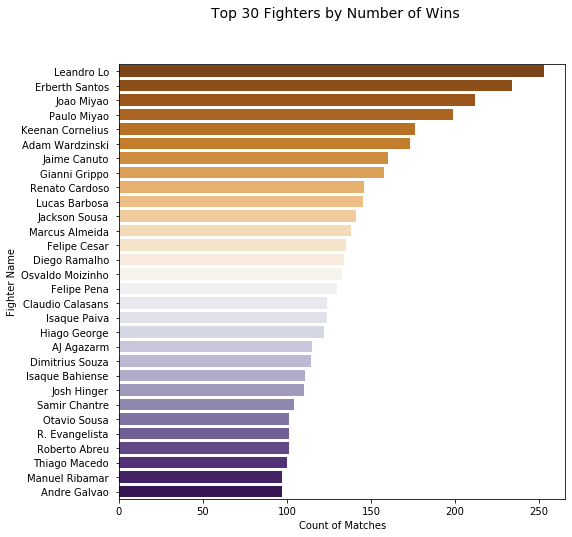

In [152]:
fighters2 = elo2.Fighter.value_counts()[:30]
df_fighter2Count = pd.DataFrame({'Fighter Name':fighters2.index, 'Count of Matches':fighters2.values}).sort_values("Count of Matches", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Top 30 Fighters by Number of Wins",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Count of Matches", y="Fighter Name", data=df_fighter2Count, palette="PuOr")
fig.savefig(path + 'Top 30 Fighters by Number of Wins.png',bbox_inches='tight')

#### Top Fighters with the Most Matches

In [144]:
elo1.Fighter.value_counts()[:30]

Leandro Lo           293
Erberth Santos       283
Joao Miyao           239
Paulo Miyao          223
Gianni Grippo        214
Keenan Cornelius     211
Adam Wardzinski      210
Jaime Canuto         208
Renato Cardoso       206
Jackson Sousa        200
Felipe Cesar         197
AJ Agazarm           188
Diego Ramalho        179
Lucas Barbosa        178
Osvaldo Moizinho     177
Claudio Calasans     170
Isaque Paiva         168
Samir Chantre        158
Marcus Almeida       153
Thiago Macedo        153
R. Evangelista       153
Victor Silverio      150
Felipe Pena          149
Murilo Santana       147
Hiago George         146
Dimitrius Souza      146
Josh Hinger          145
Otavio Sousa         143
Manuel Ribamar       139
DJ Jackson           133
Name: Fighter, dtype: int64

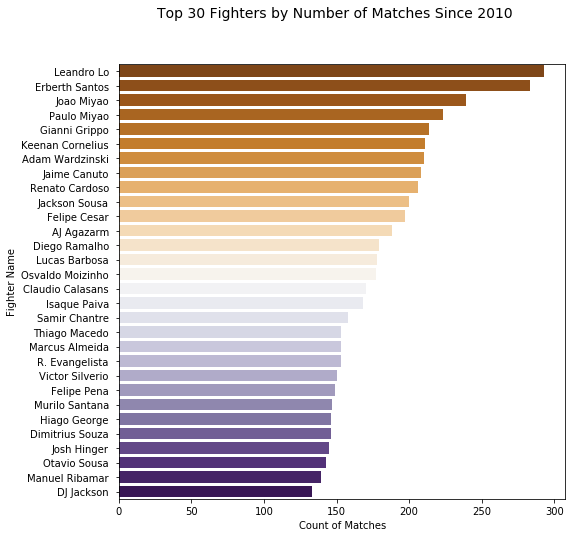

In [34]:
fighters = elo1.Fighter.value_counts()[:30]
df_fighterCount = pd.DataFrame({'Fighter Name':fighters.index, 'Count of Matches':fighters.values}).sort_values("Count of Matches", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Top 30 Fighters by Number of Matches Since 2010",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Count of Matches", y="Fighter Name", data=df_fighterCount, palette="PuOr")
fig.savefig(path + 'Top 25 Fighters by Number of Matches Since 2010.png',bbox_inches='tight')

#### Number of Fighters by Weight Class

In [6]:
elo.Weight.value_counts()

ABS      5812
82KG     2171
70KG     1893
76KG     1888
88KG     1810
         ... 
125KG       1
82KF        1
F           1
O88kg       1
88K         1
Name: Weight, Length: 97, dtype: int64

In [7]:
len(elo.Weight.unique())

98

In [8]:
elo.Weight.unique()

array(['76KG', 'ABS', '79KG', '77KG', '69KG', '82KG', '83KG', '94KG',
       '85KG', '75KG', '73KG', '88KG', '91KG', '58KG', 'O94KG', '56KG',
       '64KG', '55KG', '110KG', '100KG', '61KG', '70KG', '120KG', 'O99KG',
       'O97KG', 'O95KG', 'O100KG', '109KG', '84KG', '97KG', '81KG',
       '66KG', '65KG', nan, 'SPF', '72KG', '60KG', '86KG', '62KG', '99KG',
       '92KG', '90KG', '108KG', '67KG', 'O81KG', '93KG', 'O88KG', 'O75KG',
       '98KG', '74KG', '105KG', '87KG', '100KG+', 'O91KG', '80KG', '95KG',
       'O100', '70Kg', 'O92KG', '68KG', '63KG', 'O76KG', 'O77KG', '99+KG',
       '57KG', 'O82KG', '60+KG', 'O85KG', 'O83KG', 'U77KG', '70kg',
       'U110KG', 'HWABS', 'R1', '78KG', 'O92', 'O93KG', 'LWABS', 'O98KG',
       'O74KG', 'O79KG', 'O108KG', '124KG', 'O60KG', 'O63KG', 'O72KG',
       'O70KG', '82KF', '3RD', 'O88kg', '125KG', 'SF', 'F', '89KG', '88K',
       '104KG', '62 KG', 'O80KG'], dtype=object)

    Rooster – 57.5 kg (126.5 lbs)
    Light Feather – 64 kg (141 lbs)
    Feather – 70 kg (154 lbs)
    Light – 76 kg (167.5 lbs)
    Middle – 82.3 kg (181 lbs)
    Medium Heavy – 88.3 kg (194.5 lbs)
    Heavy – 94.3 kg (207.5 lbs)
    Super-Heavy – 100.5 kg (221.0 lbs)
    Ultra - +100.5

In [ ]:
weight_dict_ibjjf = {57: "rooster",  64: "light_feather", 70: "feather",  76: "light",
                   82: "middle" , 88: "medium_heavy" , 94: "heavy", 100:"super_heavy"}
53-59, rooster
60-65, light_feather
66-70, feather
71-77, light
78-83, middle
84-89, medium_heavy
90-94, heavy
95-100, super_heavy
101-120, ultra_heavy
             
weight_dict = {
    '76KG':'light', 'ABS':'ABS', '79KG':'middle', '77KG':'light', '69KG':'feather', '82KG':'middle', 
    '83KG':'middle', '94KG':'heavy', '85KG':'medium_heavy', '75KG':'light', '73KG':'light', '88KG':'medium_heavy', 
    '91KG':'heavy', '58KG':'rooster', '56KG':'rooster', '64KG':'light_feather', '55KG':'rooster', 
    '110KG':'ultra_heavy', '100KG':'super_heavy', '61KG':'light_feather', '70KG':'feather', '120KG':'ultra_heavy', 
    '109KG':'ultra_heavy', '84KG':'medium_heavy', '97KG':'super_heavy', '81KG':'middle', '66KG':'feather', 
    '65KG':'light_feather', '72KG':'light', '60KG':'light_feather', '86KG':'medium_heavy', '62KG':'light_feather', 
    '99KG':'super_heavy','92KG':'heavy', '90KG':'heavy', '108KG':'ultra_heavy', '67KG':'feather', '93KG':'heavy', 
    '98KG':'super_heavy', '74KG':'light', '105KG':'ultra_heavy', '87KG':'medium_heavy', '80KG':'middle', 
    '95KG':'super_heavy','70Kg':'feather', '68KG':'feather', '63KG':'light_feather', '57KG':'rooster', 
    'U77KG':'light', '70kg':'feather','U110KG':'ultra_heavy', '78KG':'middle', '82KF':'middle','89KG':'medium_heavy', 
    '88K':'medium_heavy','104KG':'ultra_heavy', '62 KG':'light_feather', '93KG':'heavy', '124KG':'ultra_heavy',
    'O108KG':'ultra_heavy', '100KG+':'ultra_heavy','99+KG':'ultra_heavy','O100KG':'ultra_heavy', 'O100':'ultra_heavy',
       }

    'O74KG', 'O79KG', 'O70KG', 'O88kg', '125KG', 'O80KG', 'O94KG', 'O99KG','O97KG', 'O95KG', 
    'O81KG', 'O88KG', 'O75KG', 'O91KG', 'O92KG', 'O76KG', 'O77KG', 'O82KG', '60+KG', 'O85KG', 
    'O83KG', 'O92', 'O93KG', 'O98KG', 'O60KG', 'O63KG', 'O72KG',

weight_dict_ibjjf = {57: "rooster",  64: "light_feather", 70: "feather",  76: "light",
                   82: "middle" , 88: "medium_heavy" , 94: "heavy", 100:"super_heavy"}

Rooster – 57.5 kg (126.5 lbs)
Light Feather – 64 kg (141 lbs)
Feather – 70 kg (154 lbs)
Light – 76 kg (167.5 lbs)
Middle – 82.3 kg (181 lbs)
Medium Heavy – 88.3 kg (194.5 lbs)
Heavy – 94.3 kg (207.5 lbs)
Super-Heavy – 100.5 kg (221.0 lbs)
Ultra - +100.5 kg

weight_dict_uae = {56: "light_feather", 62: "feather",  69: "light",
                   77: "middle" , 85: "medium_heavy" , 94: "heavy", 120:"super_heavy"}

UAE
56 - 
62
69
77 welter
85 middle
94 light heavy
120 heavy
https://events.uaejjf.org/en/uaejjf-divisions
    
Ours:
53-59, rooster
60-65, light_feather
66-70, feather
71-77, light
78-83, middle
84-89, medium_heavy
90-94, heavy
95-100, super_heavy
101-120, ultra_heavy

In [88]:
weight_dict = {
    '76KG':'light', 'ABS':'ABS', '79KG':'middle', '77KG':'light', '69KG':'feather', '82KG':'middle', 
    '83KG':'middle', '94KG':'heavy', '85KG':'medium_heavy', '75KG':'light', '73KG':'light', '88KG':'medium_heavy', 
    '91KG':'heavy', '58KG':'rooster', '56KG':'rooster', '64KG':'light_feather', '55KG':'rooster', 
    '110KG':'ultra_heavy', '100KG':'super_heavy', '61KG':'light_feather', '70KG':'feather', '120KG':'ultra_heavy', 
    '109KG':'ultra_heavy', '84KG':'medium_heavy', '97KG':'super_heavy', '81KG':'middle', '66KG':'feather', 
    '65KG':'light_feather', '72KG':'light', '60KG':'light_feather', '86KG':'medium_heavy', '62KG':'light_feather', 
    '99KG':'super_heavy','92KG':'heavy', '90KG':'heavy', '108KG':'ultra_heavy', '67KG':'feather', '93KG':'heavy', 
    '98KG':'super_heavy', '74KG':'light', '105KG':'ultra_heavy', '87KG':'medium_heavy', '80KG':'middle', 
    '95KG':'super_heavy','70Kg':'feather', '68KG':'feather', '63KG':'light_feather', '57KG':'rooster', 
    'U77KG':'light', '70kg':'feather','U110KG':'ultra_heavy', '78KG':'middle', '82KF':'middle','89KG':'medium_heavy', 
    '88K':'medium_heavy','104KG':'ultra_heavy', '62 KG':'light_feather', '93KG':'heavy', '124KG':'ultra_heavy',
    'O108KG':'ultra_heavy', '100KG+':'ultra_heavy','99+KG':'ultra_heavy','O100KG':'ultra_heavy', 'O100':'ultra_heavy',
       }
elo['Weight_Class'] = elo['Weight'].map(weight_dict)
elo 

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter,Weight_Class
0,13577,Masahiro Iwasaki,L,Points,Asian Open,76KG,4F,2017,Ali Monfaradi,light
1,13592,Keenan Cornelius,L,Armbar,Asian Open,ABS,R1,2017,Ali Monfaradi,ABS
2,13976,Adam Wardzinski,L,Arm in ezekiel,German Nationals,ABS,SF,2017,Ali Monfaradi,ABS
3,13987,Adam Wardzinski,L,Von Fluke choke,German NoGi,ABS,F,2017,Ali Monfaradi,ABS
4,14016,Jake Mackenzie,L,Points,London Fall Open,76KG,SF,2017,Ali Monfaradi,light
...,...,...,...,...,...,...,...,...,...,...
24847,17552,Lukasz Michaelec,W,Kimura,ADCC EU Trials,99KG,4F,2018,Perttu Tepponen,super_heavy
24848,17553,Andrzej Iwat,W,Pts: 3x0,ADCC EU Trials,99KG,SF,2018,Perttu Tepponen,super_heavy
24849,17555,Muslim Patsarigov,W,"Pts: 0x0, Pen",ADCC EU Trials,99KG,F,2018,Perttu Tepponen,super_heavy
24850,21808,Matheus Godoy,W,Points,Amsterdam Open,100KG,F,2019,Perttu Tepponen,super_heavy


In [89]:
elo.Weight_Class.value_counts()

ABS              5812
light            3818
medium_heavy     2957
feather          2891
middle           2696
heavy            1733
light_feather    1352
super_heavy      1317
ultra_heavy      1088
rooster           368
Name: Weight_Class, dtype: int64

In [90]:
elo.Weight_Class.isnull().sum()

820

In [91]:
elo.shape

(24852, 10)

In [94]:
# check the weight map 
light_feather = elo.loc[elo.Weight_Class == 'light_feather']
light_feather 

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter,Weight_Class
158,21647,Rodrigo Oiye,W,Choke,Pan Pac,64KG,SF,2019,Thalison Soares,light_feather
159,21648,Hideyuki Yamada,W,Armbar,Pan Pac,64KG,F,2019,Thalison Soares,light_feather
182,21081,Lucas Pinheiro,L,Pts: 2x0,No Gi Pan Am.,61KG,SF,2019,Malachi Edmond,light_feather
184,21079,Junny Ocasio,W,Pts: 4x2,No Gi Pan Am.,61KG,4F,2019,Malachi Edmond,light_feather
185,22021,Martin Davilla,W,Brabo choke,NYC Fall Open,64KG,SF,2019,Malachi Edmond,light_feather
...,...,...,...,...,...,...,...,...,...,...
24516,17427,Rey Rey,W,Heel hook,RISE 4,61KG,F,2018,Frank Rosenthal,light_feather
24518,17743,Ricky Lule,W,EBI/OT,Onnit Inv. 9,61KG,SPF,2018,Frank Rosenthal,light_feather
24519,17936,Geo Martinez,W,Pts: 1x0,Kasai Pro 4,65KG,R3,2018,Frank Rosenthal,light_feather
24522,20451,Carlos Rosado,W,EBI/OT,Rise Invitational,65KG,SPF,2019,Frank Rosenthal,light_feather


In [95]:
len(light_feather.Fighter.unique())

74

In [96]:
light_feather.Fighter.unique()

array(['Thalison Soares', 'Malachi Edmond', 'Baret Yoshida',
       'Jonas Andrade', 'Richard Alarcon', 'Junny Ocasio', 'Eric Phan',
       'Samir Chantre', 'Rubens Charles', 'Bruno Frazatto',
       'Rafael Mendes', 'Augusto Mendes', 'Robson Moura',
       'Fernando Vieira', 'Brandon Mullins', 'Gabriel Moraes',
       'Mackenzie Dern', 'Ary Farias', 'Bruno Malfacine', 'Joao Miyao',
       'Paulo Miyao', 'Ricardo Vieira', 'Guilherme Mendes',
       'Leonardo Vieira', 'Gianni Grippo', 'Bibiano Fernandes',
       'Geo Martinez', 'Joao Somalia', 'Royler Gracie',
       'Osvaldo Moizinho', 'Mikey Musumeci', 'Isaque Paiva',
       'Lucas Pinheiro', 'Tomoyuki Hashimoto', 'Jeff Glover',
       'Isaac Doederlein', 'Hiago George', 'Rodnei Barbosa',
       'Brian Mahecha', 'Chris Holdsworth', 'Darson Hemmings',
       'Rafael Mansur', 'Jose Lima', 'Tiago Bravo', 'Ryan Hall',
       'Eduardo Barboza', 'Eddie Cummings', 'Kristian Woodmansee',
       'Cleber Sousa', 'Gabriel Marangoni', 'Gilson Nun

In [97]:
elo.loc[elo.Fighter == 'Gabriel Sousa']

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter,Weight_Class
22250,16798,Tomoyuki Hashimoto,L,"Pts: 0x0, Adv",Grand Slam TYO,62KG,F,2018,Gabriel Sousa,light_feather
22251,16932,Seif Houmine,L,Choke,ACBJJ Poland,ABS,R1,2018,Gabriel Sousa,ABS
22252,17993,Hiago George,L,Botinha,Grand Slam RJ,62KG,F,2018,Gabriel Sousa,light_feather
22253,18493,Tiago Bravo,L,"Pts: 0x0, Pen",Grand Slam AD,69KG,SF,2019,Gabriel Sousa,feather
22254,19113,Hiago George,L,Referee Decision,King of Mats,69KG,RR,2019,Gabriel Sousa,feather
...,...,...,...,...,...,...,...,...,...,...
22324,21581,Alejandro Leqoc,W,Kneebar,European NoGi,67KG,SF,2019,Gabriel Sousa,feather
22325,21582,Cole Franson,W,Pts: 10x0,European NoGi,67KG,F,2019,Gabriel Sousa,feather
22326,21662,Daniel Faguntes,W,Armbar,Grand Slam RJ,62KG,R1,2019,Gabriel Sousa,light_feather
22327,22170,Alejandro Lecoq,W,Pts: 11x2,NoGi Worlds,67KG,4F,2019,Gabriel Sousa,feather


In [98]:
gs = elo.loc[elo.Fighter == 'Gabriel Sousa']
gs.Weight.unique()

array(['62KG', 'ABS', '69KG', '64KG', '65KG', '67KG', '60KG'],
      dtype=object)

***

#### 2020 Inquiry

In [2]:
elo = pd.read_csv('all_fighter_histories.csv')
elo['Fighter'] = elo.Fighter.map(lambda x: x.replace("Fight History", ""))
elo['Opponent'] = elo.Opponent.str.split(" ")
elo['Opponent'] = elo.Opponent.str[0] + " " +elo.Opponent.str[-1]
elo['Fighter'] = elo.Fighter.str.strip()
elo

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
0,13577,Masahiro Iwasaki,L,Points,Asian Open,76KG,4F,2017,Ali Monfaradi
1,13592,Keenan Cornelius,L,Armbar,Asian Open,ABS,R1,2017,Ali Monfaradi
2,13976,Adam Wardzinski,L,Arm in ezekiel,German Nationals,ABS,SF,2017,Ali Monfaradi
3,13987,Adam Wardzinski,L,Von Fluke choke,German NoGi,ABS,F,2017,Ali Monfaradi
4,14016,Jake Mackenzie,L,Points,London Fall Open,76KG,SF,2017,Ali Monfaradi
...,...,...,...,...,...,...,...,...,...
24847,17552,Lukasz Michaelec,W,Kimura,ADCC EU Trials,99KG,4F,2018,Perttu Tepponen
24848,17553,Andrzej Iwat,W,Pts: 3x0,ADCC EU Trials,99KG,SF,2018,Perttu Tepponen
24849,17555,Muslim Patsarigov,W,"Pts: 0x0, Pen",ADCC EU Trials,99KG,F,2018,Perttu Tepponen
24850,21808,Matheus Godoy,W,Points,Amsterdam Open,100KG,F,2019,Perttu Tepponen


In [6]:
yr_2019 = elo.loc[elo.Year == '2019']
yr_2019

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
20,18476,Inseong Jang,L,Pts: 2x0,JJIF World C.,77KG,R2,2019,Ali Monfaradi
21,18926,Adriano Araujo,L,"Pts: 2x2, Adv",Ras Alk. Pro,77KG,F,2019,Ali Monfaradi
22,19708,Diego Ramalho,L,Botinha,World Pro,77KG,R2,2019,Ali Monfaradi
23,19724,Diego Ramalho,L,Botinha,World Pro,77KG,RPC,2019,Ali Monfaradi
24,21560,Alexandre Molinaro,L,Points,Rome Open,76KG,SF,2019,Ali Monfaradi
...,...,...,...,...,...,...,...,...,...
24838,21812,Sebastian Brosche,L,NaN,Amsterdam Open,ABS,4F,2019,Perttu Tepponen
24839,22133,Vinny Magalhaes,L,Pts: 5x4,NoGi Worlds,ABS,R1,2019,Perttu Tepponen
24840,22225,Marcelo Gomide,L,"Pts: 0x0, Adv",NoGi Worlds,97KG,4F,2019,Perttu Tepponen
24850,21808,Matheus Godoy,W,Points,Amsterdam Open,100KG,F,2019,Perttu Tepponen


In [8]:
yr_2019.Competition.value_counts()

World Champ.      283
Pan American      224
Brasileiro        183
ADCC              161
European Open     143
                 ... 
Oktagon             1
BH Winter NGO       1
Italy Nat. Pro      1
NAGA Boston         1
Pantheon            1
Name: Competition, Length: 276, dtype: int64

In [10]:
yr_2019_wc = yr_2019.loc[yr_2019.Competition == 'World Champ.']
yr_2019_wc

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
758,20263,Felipe Pena,L,Pts: 8x2,World Champ.,88KG,4F,2019,Nisar Loynab
771,20248,Alec Baulding,W,Pts: 6x2,World Champ.,88KG,R1,2019,Nisar Loynab
772,20256,Gabriel Almeida,W,50/50 armbar,World Champ.,88KG,R2,2019,Nisar Loynab
1115,20281,Kaynan Duarte,L,Pts: 5x3,World Champ.,94KG,F,2019,Leandro Lo
1368,20274,Dominique Bell,W,Pts: 17x0,World Champ.,94KG,R2,2019,Leandro Lo
...,...,...,...,...,...,...,...,...,...
24695,20320,Otavio Nalati,W,Pts: 13x0,World Champ.,ABS,R2,2019,Marcus Almeida
24696,20322,Felipe Pena,W,Referee Decision,World Champ.,ABS,4F,2019,Marcus Almeida
24737,20213,Renato Canuto,L,Pts: 4x2,World Champ.,76KG,R2,2019,Alef Brito
24764,20207,Tommi Pulkkanen,W,Armbar,World Champ.,76KG,R1,2019,Alef Brito


In [7]:
yr_2018 = elo.loc[elo.Year == '2018']
yr_2018

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
9,14691,Julio Anjos,L,Pts: 4x2,Grand Slam AD,77KG,4F,2018,Ali Monfaradi
10,14697,Adriano Araujo,L,"Pts: 0x0, Adv",Grand Slam AD,77KG,3RD,2018,Ali Monfaradi
11,14768,Masahiro Iwasaki,L,Pts: 2x0,European Open,76KG,R1,2018,Ali Monfaradi
12,15173,Tommi Pulkkanen,L,Adv,London W. Open,76KG,SF,2018,Ali Monfaradi
13,15954,Paulo Miyao,L,Choke from back,World Pro,69KG,4F,2018,Ali Monfaradi
...,...,...,...,...,...,...,...,...,...
24845,16472,F. Alano,D,---,Copa Podio,O94KG,RR,2018,Perttu Tepponen
24846,17549,Obrad Nedic,W,Pts: 2x0,ADCC EU Trials,99KG,8F,2018,Perttu Tepponen
24847,17552,Lukasz Michaelec,W,Kimura,ADCC EU Trials,99KG,4F,2018,Perttu Tepponen
24848,17553,Andrzej Iwat,W,Pts: 3x0,ADCC EU Trials,99KG,SF,2018,Perttu Tepponen


In [11]:
yr_2018_wc = yr_2018.loc[yr_2018.Competition == 'World Champ.']
yr_2018_wc

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
94,16378,Matheus Spirandeli,L,Pts: 4x0,World Champ.,88KG,8F,2018,Diogo Sampaio
95,16430,Gutemberg Pereira,L,Points,World Champ.,ABS,RD,2018,Diogo Sampaio
143,16374,Gabriel Kitober,W,Points,World Champ.,88KG,R1,2018,Diogo Sampaio
1111,16414,Mahamed Aly,L,Injury,World Champ.,100KG,F,2018,Leandro Lo
1359,16410,Rodrigo Ribeiro,W,"Pts: 2x2, Adv",World Champ.,100KG,4F,2018,Leandro Lo
...,...,...,...,...,...,...,...,...,...
24687,16425,Victor Honorio,W,Kimura,World Champ.,O100KG,SF,2018,Marcus Almeida
24688,16427,Joao Rocha,W,Referee Decision,World Champ.,O100KG,F,2018,Marcus Almeida
24689,16444,Rodrigo Ribeiro,W,Pts: 2x0,World Champ.,ABS,8F,2018,Marcus Almeida
24690,16450,Fellipe Andrew,W,Armbar,World Champ.,ABS,4F,2018,Marcus Almeida


In [12]:
yr_2017 = elo.loc[elo.Year == '2017']
yr_2017

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
0,13577,Masahiro Iwasaki,L,Points,Asian Open,76KG,4F,2017,Ali Monfaradi
1,13592,Keenan Cornelius,L,Armbar,Asian Open,ABS,R1,2017,Ali Monfaradi
2,13976,Adam Wardzinski,L,Arm in ezekiel,German Nationals,ABS,SF,2017,Ali Monfaradi
3,13987,Adam Wardzinski,L,Von Fluke choke,German NoGi,ABS,F,2017,Ali Monfaradi
4,14016,Jake Mackenzie,L,Points,London Fall Open,76KG,SF,2017,Ali Monfaradi
...,...,...,...,...,...,...,...,...,...
24713,14643,Elijah Carlton,W,Points,Top Roller,ABS,R1,2017,Chad Hardy
24714,14644,Sterling Peace,W,Armbar,Top Roller,ABS,4F,2017,Chad Hardy
24715,14645,Jake Joe,W,Triangle,Top Roller,ABS,SF,2017,Chad Hardy
24716,14646,Ben Tucker,W,Triangle armbar,Top Roller,ABS,F,2017,Chad Hardy


In [13]:
yr_2017_wc = yr_2017.loc[yr_2017.Competition == 'World Champ.']
yr_2017_wc

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
85,13073,Lucas Barbosa,L,Pts: 4x2,World Champ.,88KG,8F,2017,Diogo Sampaio
137,13062,Romulo Azevedo,W,"Pts: 0x0, Adv",World Champ.,88KG,R1,2017,Diogo Sampaio
785,12931,Bernardo Faria,L,Pts: 16x0,World Champ.,ABS,8F,2017,Valdir Araujo
786,13058,Rodrigo Fajardo,L,"Pts: 0x0, Adv",World Champ.,88KG,R1,2017,Valdir Araujo
819,12920,Pedro Palhares,W,Pts: 2x0,World Champ.,ABS,R1,2017,Valdir Araujo
...,...,...,...,...,...,...,...,...,...
24668,12943,Erberth Santos,W,Pts: 2x0,World Champ.,ABS,SF,2017,Marcus Almeida
24669,12944,Leandro Lo,W,"Pts: 2x2, Adv",World Champ.,ABS,F,2017,Marcus Almeida
24670,13118,Igor Schneider,W,Pts: 13x7,World Champ.,O100KG,4F,2017,Marcus Almeida
24671,13120,Joao Rocha,W,Arm in ezekiel,World Champ.,O100KG,SF,2017,Marcus Almeida


In [14]:
print(len(yr_2019_wc))
print(len(yr_2018_wc))
print(len(yr_2017_wc))
worlds_subs = pd.concat([yr_2019_wc,yr_2018_wc,yr_2017_wc])
len(worlds_subs)

283
324
291


898

In [15]:
worlds_subs.Method.value_counts()

Pts: 2x0             113
Pts: 0x0, Adv         76
Referee Decision      73
Choke from back       54
Pts: 2x2, Adv         47
                    ... 
Mounted choke          1
Brad cutter choke      1
Crucifix choke         1
Pts: 12x12, Adv        1
Toe Hold               1
Name: Method, Length: 95, dtype: int64

In [16]:
worlds_subs.head(3)

,ID,Opponent,W/L,Method,Competition,Weight,Stage,Year,Fighter
758,20263,Felipe Pena,L,Pts: 8x2,World Champ.,88KG,4F,2019,Nisar Loynab
771,20248,Alec Baulding,W,Pts: 6x2,World Champ.,88KG,R1,2019,Nisar Loynab
772,20256,Gabriel Almeida,W,50/50 armbar,World Champ.,88KG,R2,2019,Nisar Loynab


In [29]:
group1 = worlds_subs.groupby('Year')['Method'].value_counts().unstack().T.fillna(0)
group1 #.sort_values(by=['Method'])

Year,2017,2018,2019
Method,,,
50/50 armbar,0.0,2.0,5.0
Adv,3.0,2.0,0.0
Arm in Ezekiel,0.0,0.0,1.0
Arm in ezekiel,6.0,8.0,2.0
Arm in guillotine,0.0,2.0,0.0
...,...,...,...
Toe Hold,1.0,0.0,0.0
Toe hold,1.0,4.0,5.0
Triangle,8.0,5.0,4.0


In [31]:
subs_groupby = worlds_subs.groupby(['Competition','Year','Method']).agg({'Method':['count']})

Method
                                       count
Competition  Year Method                    
World Champ. 2017 Adv                      3
                  Arm in ezekiel           6
                  Armbar                  12
                  Armlock                  1
                  Botinha                  4
...                                      ...
             2019 Straight ankle lock      4
                  Toe hold                 5
                  Triangle                 4
                  Triangle armbar          4
                  Wristlock                1

[172 rows x 1 columns]

In [42]:
subs_groupby = worlds_subs.groupby(['Competition','Year','Method']).agg({'Method':['count']})
subs_groupby.to_csv('Finishes_by_Year_IBJJF_WorldChampionship.csv',index=False)

In [33]:
yr_2019_wc.Method.value_counts()

Pts: 2x0               37
Referee Decision       23
Pts: 0x0, Adv          21
Pts: 2x2, Adv          19
Choke from back        17
Armbar                 13
Pts: 4x2               11
Choke                   9
Pts: 6x4                9
Botinha                 7
Pts: 4x0                6
Pts: 8x2                6
Toe hold                5
50/50 armbar            5
Straight ankle lock     4
Triangle armbar         4
Pts: 5x0                4
Pts: 6x2                4
Triangle                4
Pts: 3x0                4
Points                  4
Pts: 11x0               3
RNC                     3
Pts: 4x4, Adv           3
North south choke       3
Pts: 9x0                3
Brabo choke             3
DQ                      3
Pts: 10x4               2
EBI/OT                  2
Pts: 6x6, Adv           2
Armlock                 2
Pts: 10x8               2
Pts: 6x0                2
Pts: 19x4               2
Arm in ezekiel          2
Pts: 13x0               2
Pts: 5x3                2
Pts: 12x0   

In [34]:
comps = yr_2019_wc.Method.value_counts()[:25]
comps

Pts: 2x0               37
Referee Decision       23
Pts: 0x0, Adv          21
Pts: 2x2, Adv          19
Choke from back        17
Armbar                 13
Pts: 4x2               11
Choke                   9
Pts: 6x4                9
Botinha                 7
Pts: 4x0                6
Pts: 8x2                6
Toe hold                5
50/50 armbar            5
Straight ankle lock     4
Triangle armbar         4
Pts: 5x0                4
Pts: 6x2                4
Triangle                4
Pts: 3x0                4
Points                  4
Pts: 11x0               3
RNC                     3
Pts: 4x4, Adv           3
North south choke       3
Name: Method, dtype: int64

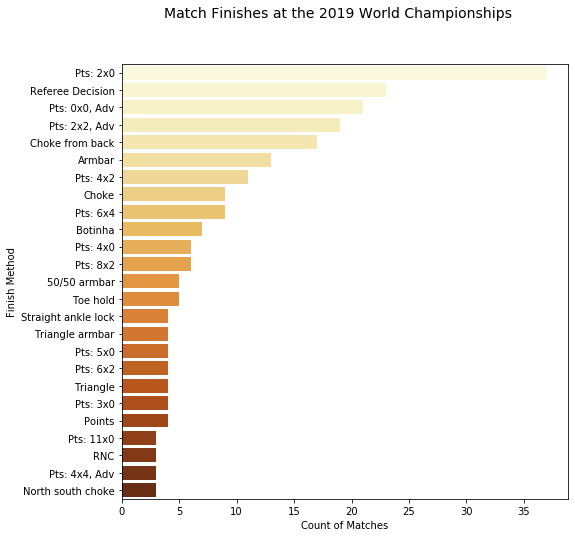

In [37]:
comps = yr_2019_wc.Method.value_counts()[:25]
df_compCount = pd.DataFrame({'Finish Method':comps.index, 'Count of Matches':comps.values}).sort_values("Count of Matches", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Match Finishes at the 2019 World Championships",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Count of Matches", y="Finish Method", data=df_compCount, palette="YlOrBr")
# fig.savefig(path + 'Number of Matches by Top 25 Competitions.png',bbox_inches='tight')

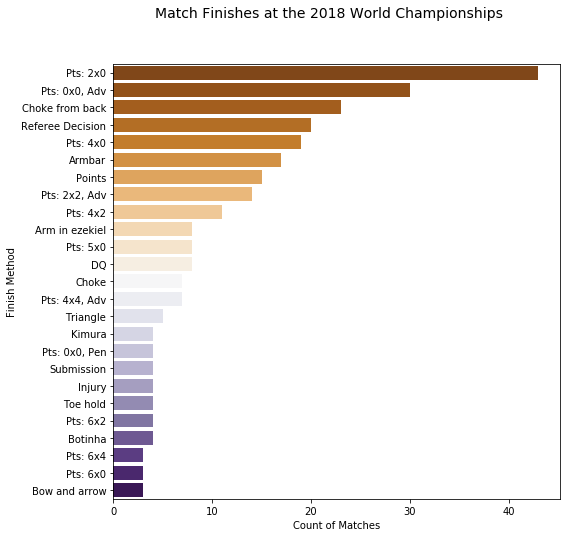

In [39]:
comps = yr_2018_wc.Method.value_counts()[:25]
df_compCount = pd.DataFrame({'Finish Method':comps.index, 'Count of Matches':comps.values}).sort_values("Count of Matches", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Match Finishes at the 2018 World Championships",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Count of Matches", y="Finish Method", data=df_compCount, palette="PuOr")

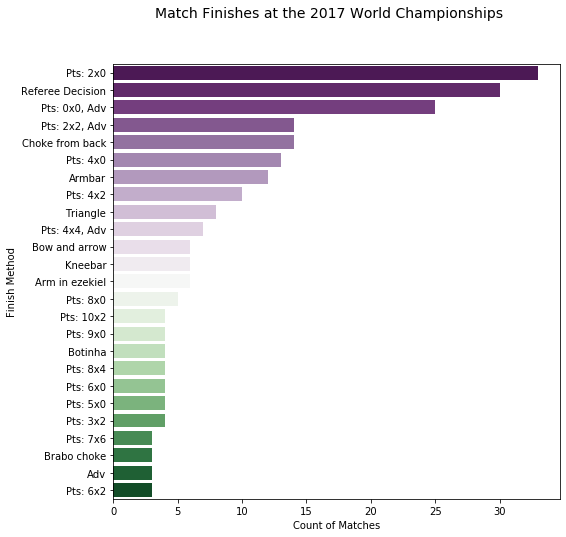

In [40]:
comps = yr_2017_wc.Method.value_counts()[:25]
df_compCount = pd.DataFrame({'Finish Method':comps.index, 'Count of Matches':comps.values}).sort_values("Count of Matches", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Match Finishes at the 2017 World Championships",fontsize=14) 
fig.set_size_inches(8, 8)
ax = sns.barplot(x="Count of Matches", y="Finish Method", data=df_compCount, palette="PRGn")

In [32]:
yr_2019_wc.groupby(['Competition','Year','Method']).agg({'Method':['count']})

Method
                                       count
Competition  Year Method                    
World Champ. 2019 50/50 armbar             5
                  Arm in Ezekiel           1
                  Arm in ezekiel           2
                  Armbar                  13
                  Armlock                  2
                  Basebal choke            1
                  Botinha                  7
                  Bow and arrow            1
                  Brabo choke              3
                  Canto choke              1
                  Choke                    9
                  Choke from back         17
                  Crucifix choke           1
                  DQ                       3
                  EBI/OT                   2
                  Ezekiel                  2
                  Footlock                 1
                  Kimura                   2
                  Kneebar                  1
                  Mounted choke            1
                  North south choke        3
                  Points                   4
                  Pts: 0x0, Adv           21
                  Pts: 10x4                2
                  Pts: 10x6                2
                  Pts: 10x8                2
                  Pts: 11x0                3
                  Pts: 11x2                2
                  Pts: 12x0                2
                  Pts: 12x12, Adv          1
                  Pts: 13x0                2
                  Pts: 17x0                2
                  Pts: 19x4                2
                  Pts: 2x0                37
                  Pts: 2x2, Adv           19
                  Pts: 3x0                 4
                  Pts: 4x0                 6
                  Pts: 4x2                11
                  Pts: 4x4, Adv            3
                  Pts: 5x0                 4
                  Pts: 5x3                 2
                  Pts: 6x0                 2
                  Pts: 6x2                 4
                  Pts: 6x4                 9
                  Pts: 6x6, Adv            2
                  Pts: 7x0                 1
                  Pts: 7x2                 2
                  Pts: 8x2                 6
                  Pts: 9x0                 3
                  Pts: 9x4                 1
                  RNC                      3
                  Referee Decision        23
                  Straight ankle lock      4
                  Toe hold                 5
                  Triangle                 4
                  Triangle armbar          4
                  Wristlock                1